## Final Project Submission


* Student name: Sharon Sonia Atieno
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: William Okomba, Nikita Njoroge



## Project Phase 1

## Objective

## Determine Whether Microsoft Should Invest In the Film Industry  

## Assumptions
## 1)The outliers present in the foreign domestic column after rescaling are a genuine representation 
## of the market
## 2)The domestic and foreign gross column even after rescaling we will assume they present total revenue sales in both foreign and domestic markets 



In [1]:
#importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
#loading our dataset
df = pd.read_csv("bom.movie_gross.csv.gz")
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#familiarizing with our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
df.shape

(3387, 5)

In [5]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

## Data Cleaning

In [6]:
#checking for duplicates
df.duplicated().value_counts()

False    3387
dtype: int64

In [7]:
#we do not have any duplicates

In [8]:
#checking for missing values in our dataset
df.isna().value_counts()

title  studio  domestic_gross  foreign_gross  year 
False  False   False           False          False    2007
                               True           False    1349
               True            False          False      26
       True    True            False          False       2
               False           False          False       2
                               True           False       1
dtype: int64

In [9]:
#checking for missing values in domestic gross column
df['domestic_gross'].isna().value_counts()

False    3359
True       28
Name: domestic_gross, dtype: int64

In [10]:
#checking for missing values in foreign gross column
df['foreign_gross'].isna().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [11]:
#dropping missing values in the domestic column
df.dropna(how = 'any', subset =['domestic_gross'], inplace = True)

In [12]:
df.shape

(3359, 5)

In [13]:
#converting column foreign cross from object to a numeric value

df['foreign_gross'] = df['foreign_gross'].apply(pd.to_numeric, errors='coerce')
df['foreign_gross'].fillna(df['foreign_gross'].median(),inplace=True)
df['foreign_gross'].isna().value_counts()

False    3359
Name: foreign_gross, dtype: int64

In [14]:
#Checking for outliers on domestic gross and foreign gross column

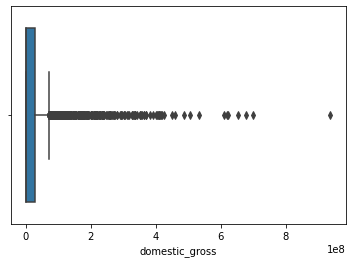

In [15]:
sns.boxplot(data=df, x="domestic_gross");

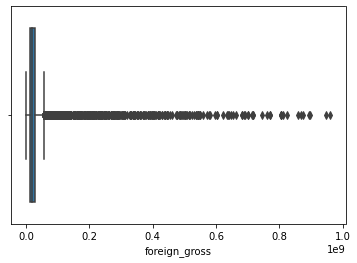

In [16]:
sns.boxplot(data=df, x="foreign_gross");

In [17]:
#clearing out outliers 

In [18]:
#using log to rescale our dataset

In [19]:
#rescaling domestic gross column
df['Log_of_domestic_gross'] = [np.log(x) for x in df['domestic_gross']]

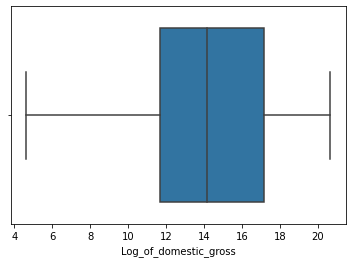

In [20]:
sns.boxplot(data=df, x=df['Log_of_domestic_gross']);

In [21]:
#rescaling foreign gross column
df['Log_of_foreign_gross'] = [np.log(x) for x in df['foreign_gross']]

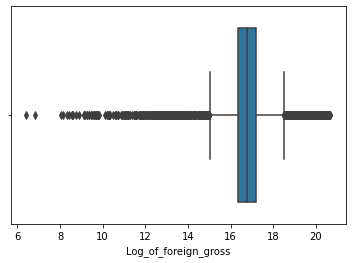

In [22]:
sns.boxplot(data=df, x=df['Log_of_foreign_gross']);

In [23]:
df.shape

(3359, 7)

In [24]:
#setting our column title to be the index of our dataset 
df.set_index('title')

,studio,domestic_gross,foreign_gross,year,Log_of_domestic_gross,Log_of_foreign_gross
title,,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,19.843789,20.295555
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,19.627250,20.354084
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,19.505870,20.314244
Inception,WB,292600000.0,535700000.0,2010,19.494317,20.099085
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,19.290718,20.057539
...,...,...,...,...,...,...
The Quake,Magn.,6200.0,19550000.0,2018,8.732305,16.788486
Edward II (2018 re-release),FM,4800.0,19550000.0,2018,8.476371,16.788486
El Pacto,Sony,2500.0,19550000.0,2018,7.824046,16.788486


In [25]:
#dropping column domestic_gross and foreign_gross
df = df.drop(["domestic_gross", "foreign_gross"], axis = 1)

In [26]:
#renaming our columns to an acceptable convention
df = df.rename(columns={'Log_of_domestic_gross': 'domestic_gross', 'Log_of_foreign_gross' : 'foreign_gross'})

In [27]:
df.head()

,title,studio,year,domestic_gross,foreign_gross
0,Toy Story 3,BV,2010,19.843789,20.295555
1,Alice in Wonderland (2010),BV,2010,19.627250,20.354084
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,19.505870,20.314244
3,Inception,WB,2010,19.494317,20.099085
4,Shrek Forever After,P/DW,2010,19.290718,20.057539


In [28]:
df.set_index('title')

,studio,year,domestic_gross,foreign_gross
title,,,,
Toy Story 3,BV,2010,19.843789,20.295555
Alice in Wonderland (2010),BV,2010,19.627250,20.354084
Harry Potter and the Deathly Hallows Part 1,WB,2010,19.505870,20.314244
Inception,WB,2010,19.494317,20.099085
Shrek Forever After,P/DW,2010,19.290718,20.057539
...,...,...,...,...
The Quake,Magn.,2018,8.732305,16.788486
Edward II (2018 re-release),FM,2018,8.476371,16.788486
El Pacto,Sony,2018,7.824046,16.788486


## Investigating the Relationship Between our Variables

In [29]:
#assigning variables to column domestic gross and foreign gross
x = df['domestic_gross']
y = df['foreign_gross']

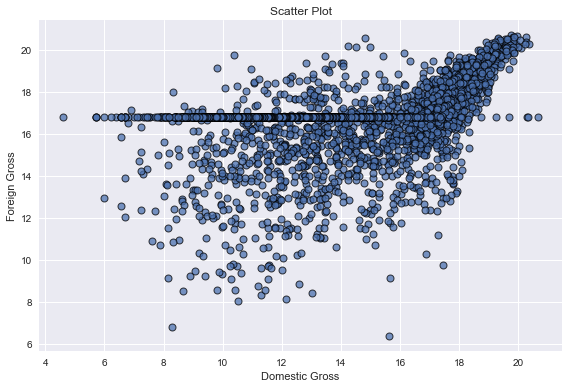

In [30]:
#testing correlation between foreign gross and domestic column
plt.style.use('seaborn')
plt.scatter(x, y , edgecolor='black', linewidth=1, alpha=0.75)

plt.title('Scatter Plot')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.tight_layout()

In [31]:
#The two variables have a positive linear relationship 

## Using Historical Data to Make Future Predictions on Domestic and Foreign Revenue Based on Past Trends 

In [32]:
#studying trends of the dataset using a line graph 

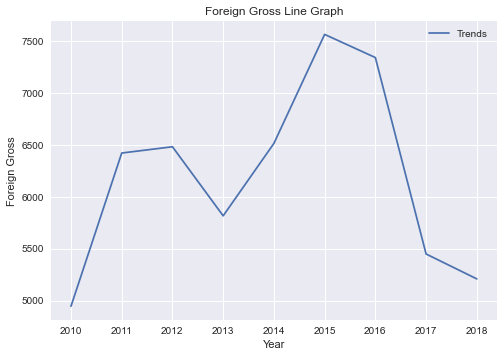

In [33]:
#plotting foreign gross line graph
lineplot = sns.lineplot(data=df, x='year', y='foreign_gross', ci=None, estimator=sum)

lineplot.set(xlabel = 'Year')
lineplot.set(ylabel = 'Foreign Gross')
lineplot.set(title = 'Foreign Gross Line Graph')
plt.legend(['Trends']);

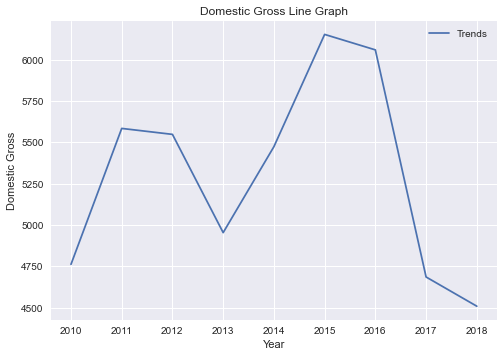

In [34]:
#plotting domestic gross line graph 
lineplot = sns.lineplot(data=df, x='year', y='domestic_gross', ci=None, estimator=sum)

lineplot.set(xlabel = 'Year')
lineplot.set(ylabel = 'Domestic Gross')
lineplot.set(title = 'Domestic Gross Line Graph')
plt.legend(['Trends']);

## Plotting Bar Graphs 

In [35]:
#creating a foreign gross dataframe
foreign_gross_df = (df[['title','studio','foreign_gross']].copy())
foreign_gross_df.head(5)

#top 100 foreign movies from our foreign gross dataframe 
forgn_df_top_100= foreign_gross_df.head(100)
forgn_studio = dict(forgn_df_top_100['studio'].value_counts().head(10))
top_forgn_studio = list(dict(dict(forgn_studio)).keys())
top_forgn_studio_val = list(dict(dict(forgn_studio)).values())

print(top_forgn_studio)
print(top_forgn_studio_val)



['Fox', 'WB', 'BV', 'Uni.', 'Par.', 'Sony', 'LGF', 'SGem', 'Sum.', 'P/DW']
[14, 14, 11, 9, 8, 8, 7, 6, 5, 4]


In [36]:
#creating a domestic gross dataframe
domestic_gross_df = (df[['title','studio','foreign_gross']].copy())
domestic_gross_df.head()

#top 100 domestic movies from our gross domestic dataframe
dom_df_top_100= domestic_gross_df.head(100)
dom_studio = dict(dom_df_top_100['studio'].value_counts().head(10))
top_dom_studio = list(dict(dict(dom_studio)).keys())
top_dom_studio_val = list(dict(dict(dom_studio)).values())

print(top_dom_studio)
print(top_dom_studio_val)

['Fox', 'WB', 'BV', 'Uni.', 'Par.', 'Sony', 'LGF', 'SGem', 'Sum.', 'P/DW']
[14, 14, 11, 9, 8, 8, 7, 6, 5, 4]


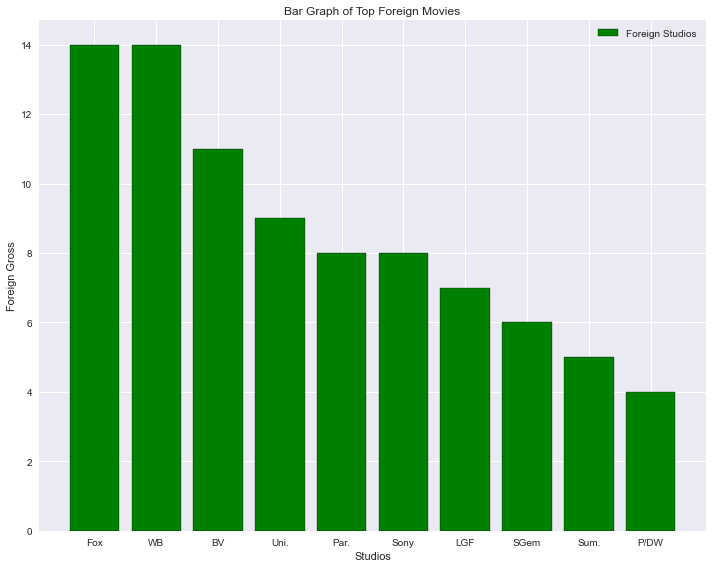

In [37]:
#bar graph for top foreign studios

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x=top_forgn_studio, height=top_forgn_studio_val, edgecolor='black',color='green')
ax.set_title('Bar Graph of Top Foreign Movies')
ax.set_xlabel('Studios')
ax.set_ylabel('Foreign Gross')
plt.tight_layout()
plt.legend(['Foreign Studios']);

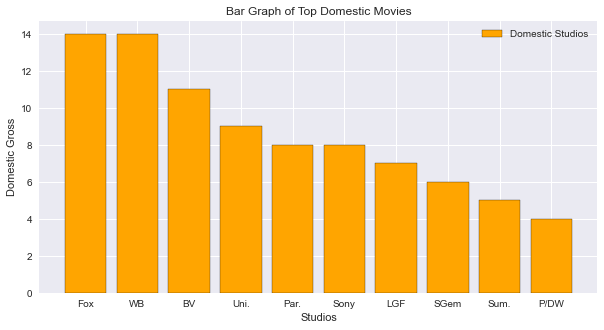

In [38]:
#bar graph for top domestic studios
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x=top_dom_studio, height=top_dom_studio_val,edgecolor='black' ,color='orange')
ax.set_title('Bar Graph of Top Domestic Movies')
ax.set_xlabel('Studios')
ax.set_ylabel('Domestic Gross')
plt.legend(['Domestic Studios']);

In [39]:
#creating a pie chart 

In [40]:
#combinig the numeric value in our column
a = int(df['foreign_gross'].sum())
b =  int(df['domestic_gross'].sum())

In [41]:
slices = [a, b]
labels = ['Foreign Gross', 'Domestic Gross']
explode = [0, 0.05]


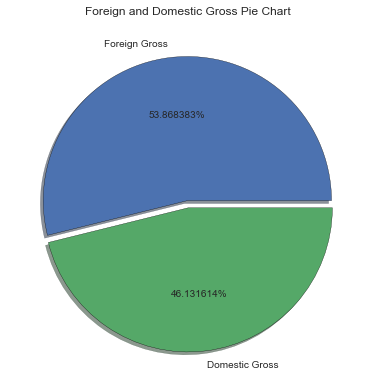

In [42]:
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True, autopct='%0f%%')

plt.title('Foreign and Domestic Gross Pie Chart')
plt.tight_layout()
plt.show()



In [43]:
#foreign gross market will generate slightly more revenue than domestic gross market